## Drzewo decyzyjne

### 1. Wstęp

### 1.1. Przykład
Dane w pliku to id, płeć, zarobki, wiek, oraz zmienna zależna: dokona zakupu czy nie (0/1)

Dokładność: 0.925
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120

[[69  4]
 [ 5 42]]


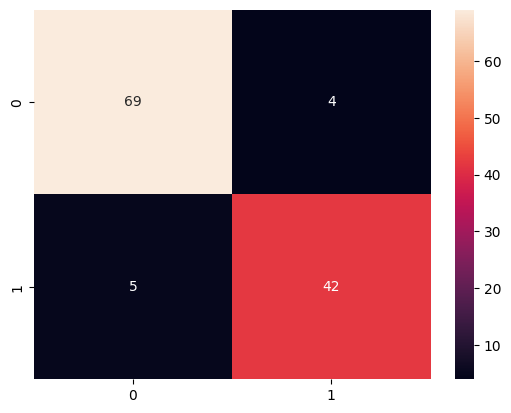

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv("PurchasesByGender.csv")

# Przekształcenie kolumny 'Gender' na wartości numeryczne
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Male=1, Female=0

# Wybór cech (feature columns) i etykiety (target)
X = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tworzenie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Przewidywanie
y_pred = clf.predict(X_test)

# Ocena modelu
print("Dokładność:", accuracy_score(y_test, y_pred))
print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred)) # TN, FP, FN, TP

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
           
plt.show()


### 1.2 Drukowanie wyglądu drzewa decyzyjnego

In [ ]:
plt.figure(figsize=(20, 10))  # rozmiar rysunku
plot_tree(clf, 
          feature_names=["Gender", "Age", "EstimatedSalary"],
          class_names=["Nie kupił", "Kupił"],
          filled=True, 
          rounded=True)
plt.title("Graficzne przedstawienie drzewa decyzyjnego")
plt.show()